In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


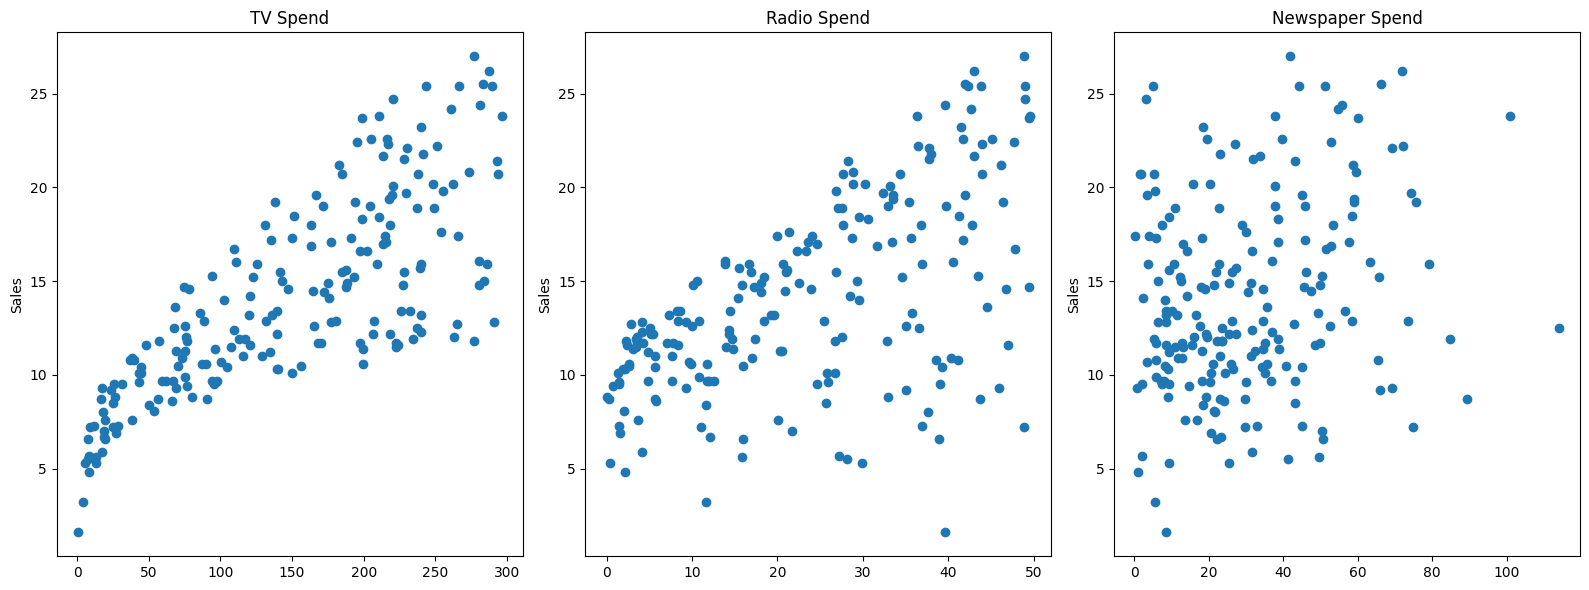

In [5]:
fig, axes = plt.subplots(nrows=1, ncols= 3, figsize=(16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_title('Radio Spend')
axes[1].set_ylabel('Sales')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_title('Newspaper Spend')
axes[2].set_ylabel('Sales')
plt.tight_layout()

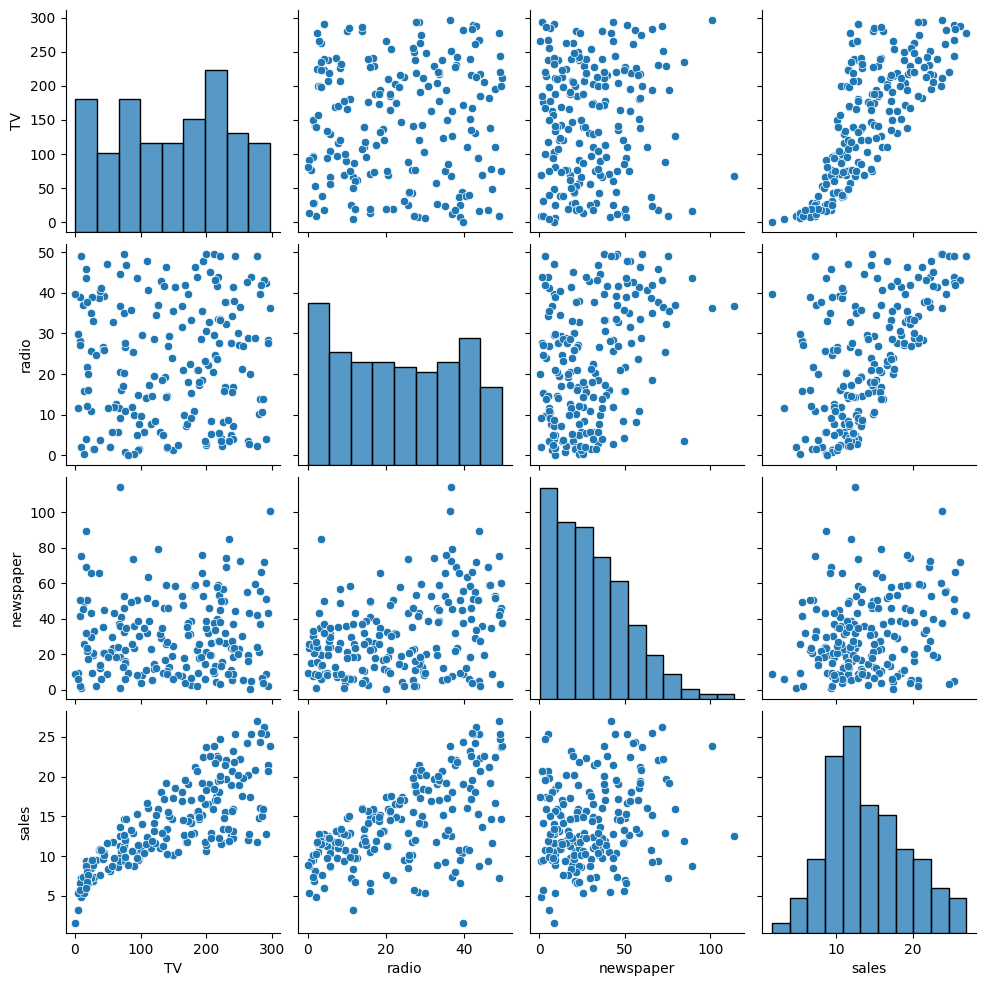

In [6]:
sns.pairplot(df)

# 

In [7]:
X = df.drop('sales', axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [8]:
y = df['sales']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
len(df)

200

In [11]:
len(X_train), len(X_test)
# train_test_split result

(140, 60)

In [12]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
#help(LinearRegression)

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
test_predictions = model.predict(X_test)

In [21]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [22]:
y_test.head()

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [ ]:
#these metrics are for regression problems
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [25]:
df['sales'].mean()

np.float64(14.0225)

<Axes: xlabel='sales', ylabel='Count'>

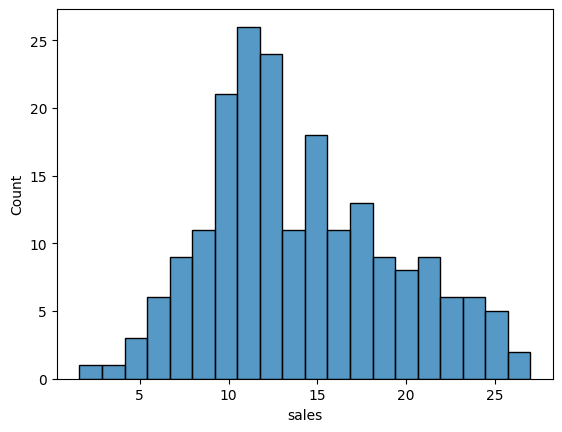

In [29]:
sns.histplot(data=df, x='sales', bins=20)

In [32]:
mean_absolute_error(y_test, test_predictions)
#MAE
# on average our predictions are about 1.5 away from the actual value
#around 10% error

1.213745773614481

In [ ]:
mean_squared_error(y_test, test_predictions)
#MSE
#this is in squared units


2.2987166978863782

In [ ]:
np.sqrt(mean_squared_error(y_test, test_predictions))
#RMSE

#describes the standard deviation of the residuals

#this is in the same units as the target
#this is around 12% error
#we prefer RMSE over MAE because it penalizes larger errors more

np.float64(1.516151937599388)

In [ ]:
#if MAE results are much lower than RMSE results, it indicates presence of outliers
#If they are similar, it means the errors are more consistent

In [ ]:
#IF we had a lot of outliers we might prefer MAE

In [36]:
test_residuals = y_test - test_predictions
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

In [42]:
y_test.head()

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

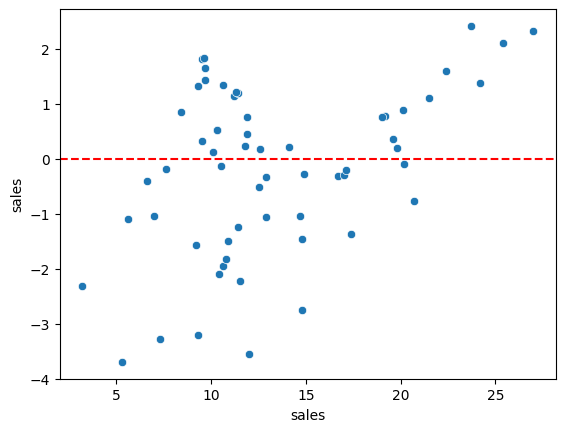

In [ ]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', linestyle='--')
#we want the residuals to be randomly scattered around 0
#we dont want to see any obvious patterns
#this is a good sign
#if we saw a curve, it would indicate that a non-linear model might be better

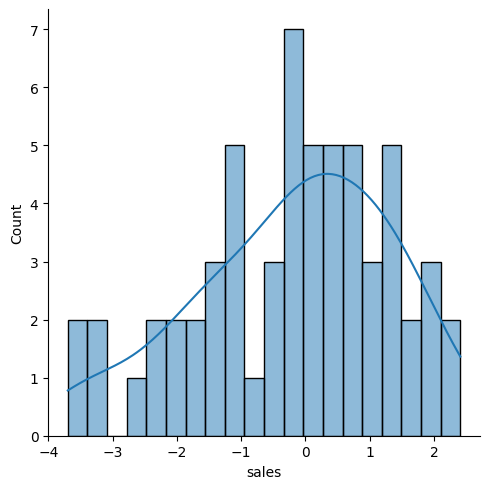

In [ ]:
sns.displot(test_residuals, bins=20, kde=True)
#we want this to look like a normal distribution
#this is a good sign


In [44]:
import scipy as sp

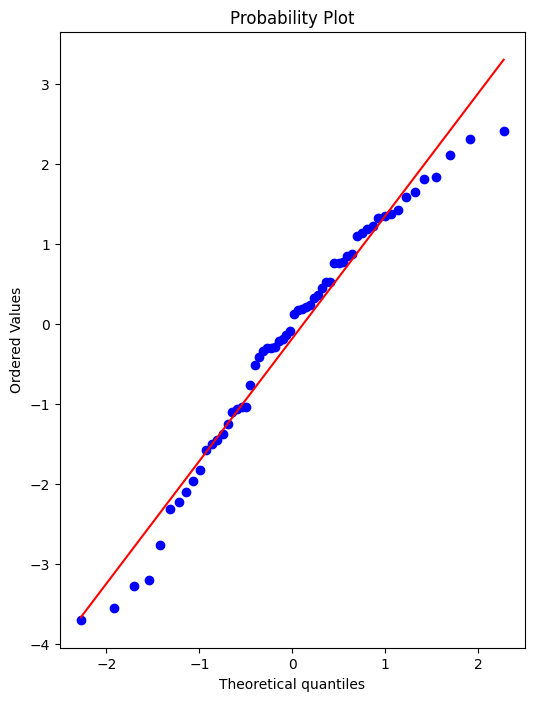

In [ ]:
fig, ax = plt.subplots(figsize=(6,8), dpi=100)

_ = sp.stats.probplot(test_residuals, plot=ax)

#we want the points to follow the line closely
#this is a good sign

#if there were large deviations from the line, it would indicate that 
# the residuals are not normally distributed


In [47]:
final_model = LinearRegression()
final_model.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
final_model.coef_
#these are the coefficients for each feature in the order they appear in X

#for newspaper, the coefficient is negative

#formally, this means that as newspaper spend increases, sales decrease,
# when holding other features constant

array([ 0.04576465,  0.18853002, -0.00103749])

In [49]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [50]:
y_hat = final_model.predict(X)

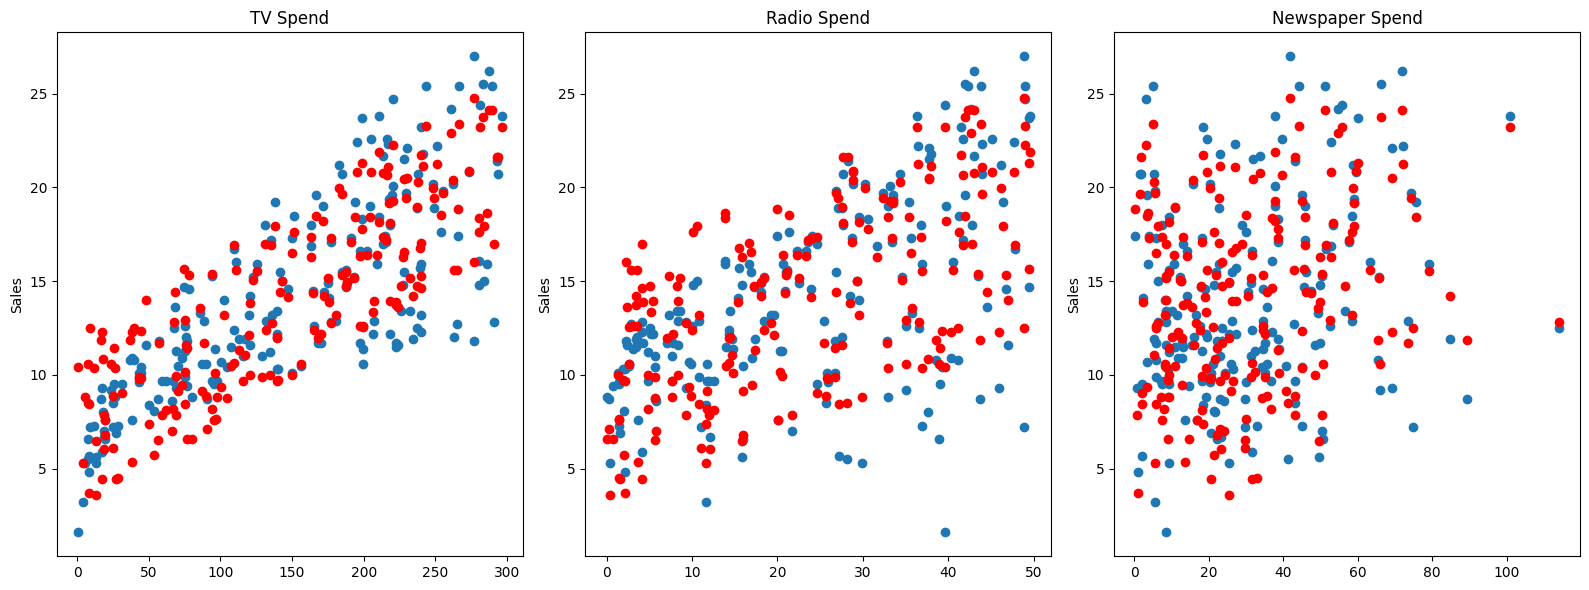

In [51]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [52]:
from joblib import dump, load

In [53]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [56]:
loaded_model = load("final_sales_model.joblib")


In [57]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [58]:
X.shape

(200, 3)

In [59]:
campaign = [[149, 22, 12]] #TV, radio, newspaper
#Sales?

In [60]:
loaded_model.predict(campaign)

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])